<a href="https://colab.research.google.com/github/alirezash97/BRATS2015/blob/master/results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K

def soft_dice_loss(y_true, y_pred, axis=(1, 2, 3), 
                   epsilon=0.00001):
  
    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true**2, axis=axis) + K.sum(y_pred**2, axis=axis) + epsilon
    dice_loss = 1 - K.mean((dice_numerator)/(dice_denominator))


    return dice_loss


def dice_coefficient(y_true, y_pred, axis=(1, 2, 3), 
                     epsilon=0.00001):

    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true, axis=axis) + K.sum(y_pred, axis=axis) + epsilon
    dice_coefficient = K.mean((dice_numerator)/(dice_denominator))
    
 
    return dice_coefficient

In [46]:

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('/content/drive/My Drive/BRATS2020/AcidModel_plus.03-0.78.h5', custom_objects={'soft_dice_loss':soft_dice_loss, 'dice_coefficient':dice_coefficient})
# summarize model.
model.summary()
# load dataset

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 240, 240, 155 0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 240, 240, 128 178688      input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 240, 240, 128 147584      conv2d_25[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 120, 120, 128 0           conv2d_26[0][0]                  
____________________________________________________________________________________________

In [0]:

import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt


img = nib.load('/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_027/BraTS20_Training_027_t1.nii.gz').get_fdata()
y_true = nib.load("/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_027/BraTS20_Training_027_seg.nii.gz").get_fdata()

In [4]:
print(img.shape)

(240, 240, 155)


In [5]:
print(y_true.shape)

(240, 240, 155)


In [0]:
y_true = y_true.reshape((1, 240, 240, 155)) 
# y_true_ = np.zeros((48, 240, 240, 3))
# for i in range (1, 49):
#   y_true_[i-1, :, :, :] = y_true[:, :, :, i*3:(i+1)*3]
# y_true_ = y_true_.reshape((48, 240, 240, 3))

In [0]:

img = img.reshape((240, 240, 155))
# tempp = np.zeros((48, 240, 240, 3))
# for i in range (1, 49):
#   tempp[i-1, :, :, :] = img[:, :, :, i*3:(i+1)*3]
# image = tempp.reshape((1, 48, 240, 240, 3))

In [64]:
from ipywidgets import interact

def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 3
    plt.imshow(img[:, :, layer], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, 155 - 1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

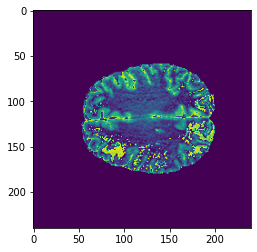

In [31]:
plt.imshow((img[0, :, :, 100] * 255).astype(np.uint8))

In [0]:
y_predict = model.predict(img)

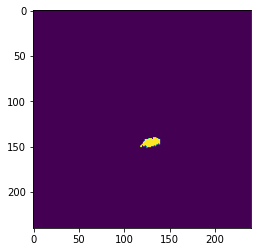

In [51]:
plt.imshow((y_true[0, :, :, 100] * 255).astype(np.uint8))

In [15]:
print(y_predict.shape)

(1, 240, 240, 155)


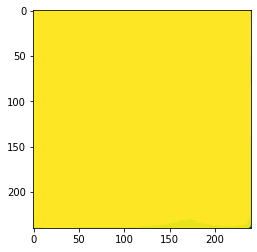

In [52]:

plt.imshow((y_predict[0, :, :, 100] * 255).astype(np.uint8))


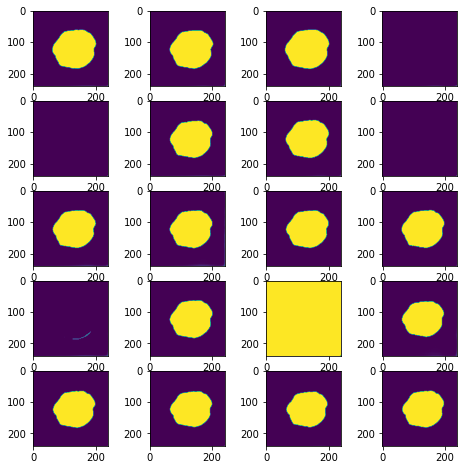

In [53]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = y_predict[0, :, :, i+85]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

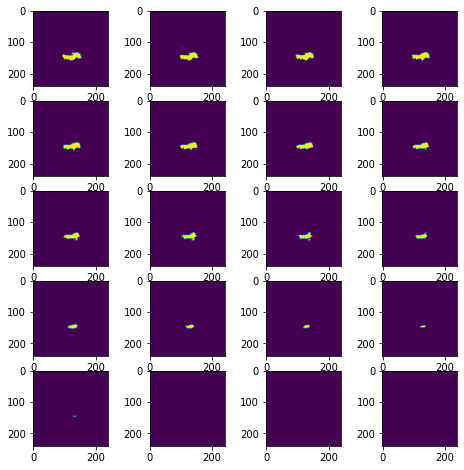

In [54]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = y_true[0, :, :, i+85]
    fig.add_subplot(rows, columns, i)
    plt.imshow((img * 255).astype(np.uint8))
plt.show()